# **Transfer Learning algorithm**

In this notebook we will analyze the **Transfer learning** algorithm, a machine learning technique which uses knowledge gained from another models to improve performance on a new model which task is similar to the task of the pre-trained model. This technique is very usefull in create deep learning model, especially on the training phase in which you can rely on a starting model whose weights connection have already been trained and your modell won't start from zero.

On this notebook we will firstly take a look on both artificial and convolution neural networks, then we'll dive into the algorithm firstly by analizing the steps and the pros and cons and then by using it to create a convolutional neural network which will be able to recognize some bug images 

## Breaf notes about Artificial Neural Networks (ANN)

An artifical neural network is based, as for human neural network, on the neuron.

In computer science a neuron is a node which has:
- Many weighted inuts
- The body, which take the inputs and, by using an activation function, compute a value
- One or more output(s) which goal is to propagate the value that the body computed

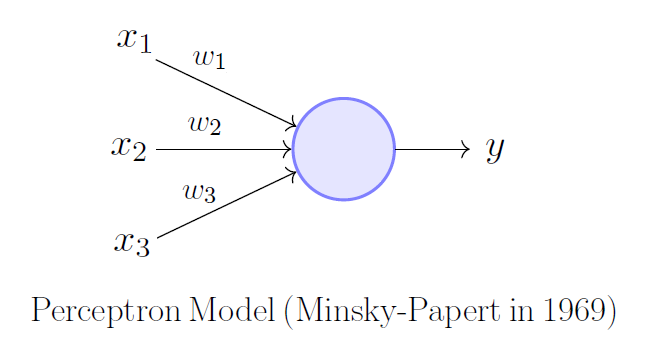

Before talking about the architecture of an artificial neural network it's important to see in which way the weights are updated because this is the process that allows the network to learn and improove itself.

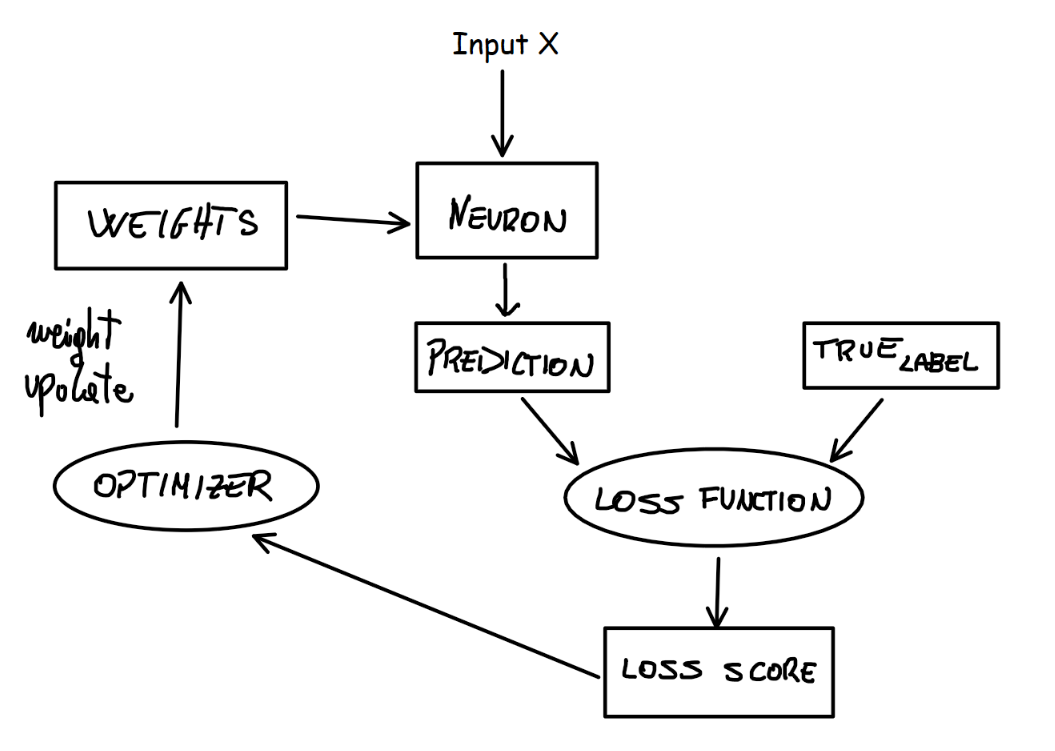

As explained by the image the neuron (or the network) do a prediction. This predicition is compared to the the true label with a *Loss function* which produces a loss score which will be probagate to the weights, the weights change and the process go on. By doing this many times the model will set the perfect weights we need in order to have the minimum possible loss score. The propagation process is called **Back propagation**.

Now we are ready to talk about the architecture of an artifical neural network. The neurons are connected each other, and we have already said this, but we didn't say that the network is organizes in layers. We have:
- An input layer which number of neurons depends on the input dimension
- An output layer which has as many neurons as the classes the model has to predict for classification tasks, an one neuron for regression tasks.
- One or more hidden layer.

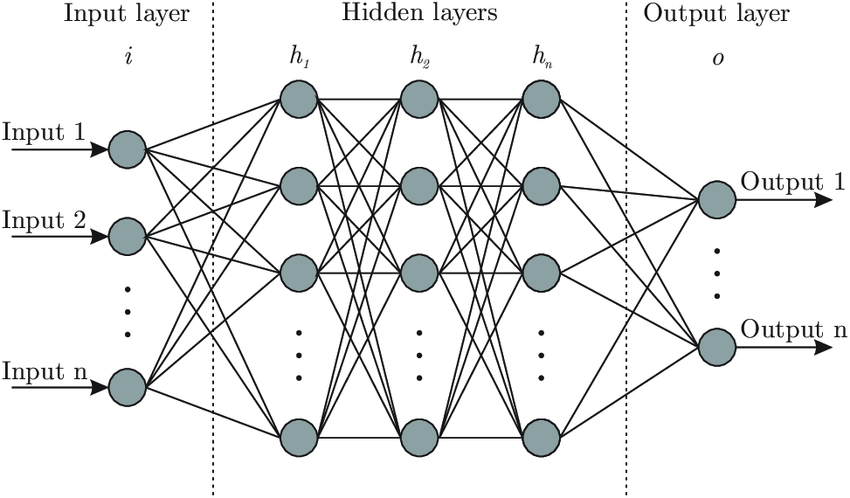

## Convolutional Neural Networks

A Convolutional neural network it's a kind of neural network which is design to work with data that has a spatial structure. The main feature of this network is the use of multiple convolutional layers which are able to extract characteristics from the inputs.

A **convolutional layer** is based on a set of filters (kernel) that scroll through the input data by calculating the scalar product the image's pixels values and the weights that are associated to the filter. This operation is done as many time as many kernels we have, at the and we have another layer: the *Pooling layer*, the goal of this layer is to reduce the size of the input by performing a compression of its informations.

The application of a convolution kernel will produce another image with the same size to the starting image. The goal of the pooling layer is to make a summary of the image. There are two types of pooling:
- Average pooling, that converts an area of the image from the actual value to the average value of its cells
- Max Pooling that takes the cell with the maximum value

Both kernel and polling is a square matrix, kernel is often a 3x3 (or 5x5) matrix and the pooling matrix is often a 2x2 matrix.

**Convolution filter**

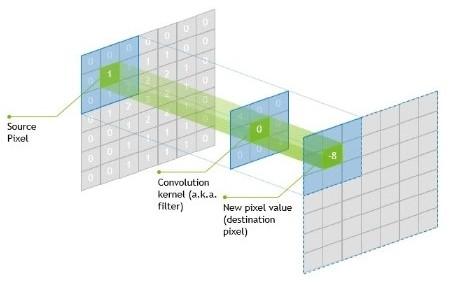

**Types of pooling layers**

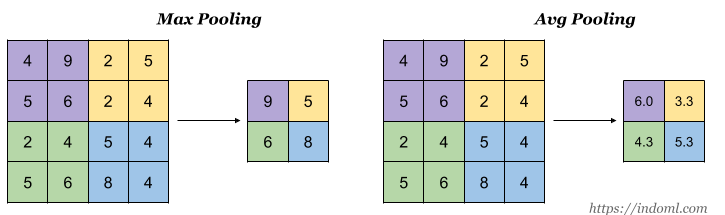

## Transfer Learning algorithm

The goodness of a convolution (artificial) neural network depends a lot on the training process. But not also in the training process we perform for our task by submitting to the network our data, the goodness depends on the various training process to which the network has been exposed, through these processes the network learn many different patterns that will be usefull for predicting any type of data. By using the **Transfer Learning** algorithm we can inherit a network which has already been trained many other times on many other tasks, which have to be similar to our task. This method consists in take a pre-trained model, adapt the input and output layers to or task, and train the model with our data. The reason behind this advantage is that we inherit not also the structure of the model but also its weights. This is the most important part, because the weights rappresent the knowledge of a model, and by inheriting the weights we are inheriting the knowledge.

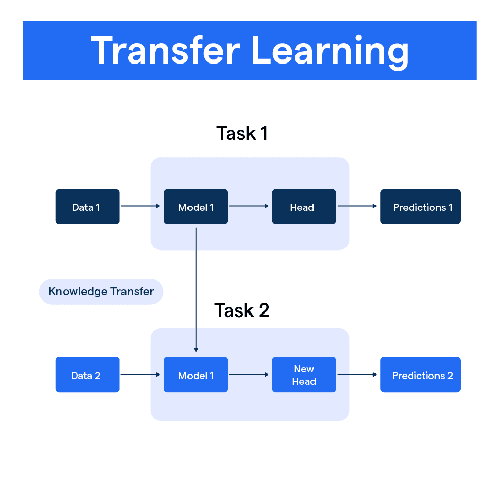

## Pros
- **Computational costs:** This method is widely used in image recognition tasks, this is because in a CNN we have to train not only the weights between the layers but also the convolutional filter. By removing these training times we are able to train a new model in much less time.
- **Generalizability:** The new model will also be more able to generalize on the task, which is good to avoid overfitting, this is because they have been exposed to a large variety of data during the initial training.

## Cons
- **Dependence on the pre-trained model:** The new model's goodness depends on what the pre-trained model learned. If we chose a model which was trained on a different type of task our new model won't be as good as we expect
- **Overfitting:** This method isn't immune to overfitting, our dataset must be big as needed and we have to perform also a good feature engineering on the data.

# The Algorithm

This algorithm will return a new model based on a given a trained on another dataset avoiding the last fully connected layers and with input layer adapt to out task


***TransferLearning**(PreTrainedModel)*:

1. $InputModel \leftarrow PreTrainedModel$
1. **repeat**
1. $\quad$ **for each** $layer\ in\ InputModel$
1. $\quad\quad$#*Freeze the weights on the pre-trained layers*
1. $\quad\quad$ $layer.trainable \leftarrow False$ 
1. *#Add some layers to adapt the model to the specified task*
1. $OutputModel \leftarrow New\ Model$
1. $OutputModel.add(New\ FlattenLayer)$
1. $OutputModel.add(New\ DenseLayer)$
1. *#how many layers the task needs*
1. $OutputModel.add(New\ DenseLayer)$
1. $Model \leftarrow New\ Model(InputModel,\ OutputModel)$
1. **Return** *Model*


## Step 1 - Load the dataset

The dataset rappresents images of the jute pest. We have 17 different types of pest.
The pictures are located inside a local folder. We have:

1. Download the images from the directory to a dataset by specifing:
1. $\quad$ the location where the images are located
1. $\quad$ the name of the label
1. $\quad$ the format of the label
1. $\quad$ the number of images to take at every batch
1. $\quad$ the image size: we resize every image to a specific size
1. $\quad$ then we shuffle the images on the dataset

Then, in order to make our future job easy, we have to put the data inside a numpy array

Now we have 4 numpy arrays:

1. train_images, train_labels: we will use them to train and validate the model
1. test_images, test_labels: we will use it to test the model

Then we plot some of the dataset images

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = 'Jute_Pest_Dataset\\train'
test_dir = 'Jute_Pest_Dataset\\test'

batch_size = 32
img_height = 224
img_width = 224

train_dataset = image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

test_dataset = image_dataset_from_directory(
    directory=test_dir,
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True
)

test_images, test_labels = [], []
train_images, train_labels = [], []

for images, labels in train_dataset:
    train_images.extend(images.numpy())
    train_labels.extend(labels.numpy())

train_images = np.array(train_images)
train_labels = np.array(train_labels)

for images, labels in test_dataset:
    test_images.extend(images.numpy())
    test_labels.extend(labels.numpy())

test_images = np.array(test_images)
test_labels = np.array(test_labels)

train_labels = np.expand_dims(train_labels, axis=-1)
test_labels = np.expand_dims(test_labels, axis=-1)

print (train_images.shape, train_labels.shape)
print (test_images.shape, test_labels.shape)

Found 6775 files belonging to 17 classes.
Found 379 files belonging to 17 classes.
(6775, 224, 224, 3) (6775, 1)
(379, 224, 224, 3) (379, 1)


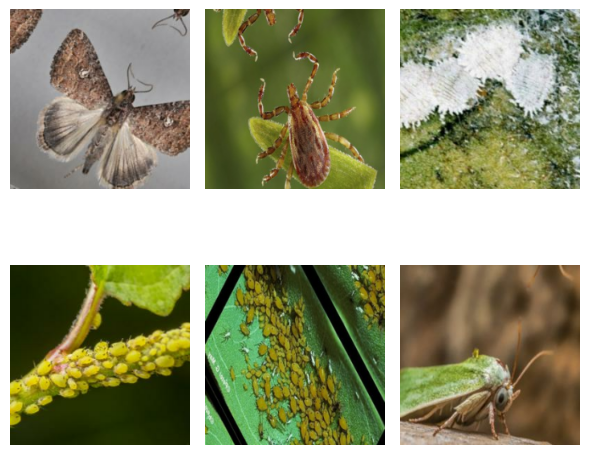

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6,6))
axes = axes.flatten()

for i in range(6):
    axes[i].imshow(train_images[i].astype(np.uint8))
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Step 2 - Feature engiineering

In this step we prepare the dataset in order to prevent the overfitting. Particularly we use the *Data augmentation* technique, this is to increase the diversity of the data, and we do it by transforming the images artificially so, from a picture we create another one which means doesn't change.
Then  we split the test in train and validation, the first will use to train the network and the second will use to perform a fine-tuning of the parameter

In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_labels = to_categorical(train_labels)
train_datagen = ImageDataGenerator( rescale=1./255,         #map bit values ​​between 0 and 1
                                    rotation_range=40,      #randomly rotate images to increase model robustness
                                    width_shift_range=0.2,  #randomly shift images horizontally
                                    height_shift_range=0.2, #randomly shift images vertically
                                    shear_range=0.2,        #apply cut transformation
                                    zoom_range=0.2,         #perform random zoom
                                    horizontal_flip=True,   #perform horizontal flip
                                    fill_mode='nearest',    #specifies blank pixel filling mode
                                    validation_split= .2,)  #split training and validation


train_generator = train_datagen.flow(train_images, train_labels, 
                                     subset="training")
valid_generator = train_datagen.flow(train_images, train_labels, 
                                     subset="validation")

## Step 3 - Create a model

The best way to prove the goodness of the transfer learning is to compare a model build from zero and a model pre-trained.

In this step we will create a convolutional neural network. This network will be composed similar to what we explained before at the *Convolution Neural Network* chapter. So we use convolutional filters, max pooling layers, flatten layers, dense layers and we also insert **dropouyt**. Dropout is another technique to prevent the overfiting, in this case we prevent the overfitting due to the model. This technique insert some noise inside the network by switching off some neurons, the network will have to found a different way to learn and this will increase the robustness of the model.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Input

# initialize the network
base_model = Sequential()

base_model.add(Input(shape=(224, 224, 3)))  
base_model.add( Conv2D(64, (3, 3))) 
base_model.add( Activation("relu") )
base_model.add( MaxPooling2D( (2, 2) ) )

base_model.add( Conv2D(64, (3, 3)) )
base_model.add( Activation("relu") )
base_model.add( MaxPooling2D((2, 2)) )

base_model.add( Conv2D(64, (3, 3)) )
base_model.add( Activation("relu") )
base_model.add( MaxPooling2D((2, 2)) )

base_model.add( Conv2D(64, (3, 3)) )
base_model.add( Activation("relu") )
base_model.add( MaxPooling2D((2, 2)) )

base_model.add( Conv2D(64, (3, 3)) )
base_model.add( Activation("relu") )
base_model.add( MaxPooling2D((2, 2)) )
### DROPOUT
base_model.add( Dropout(0.5) )

base_model.add( Flatten() )

base_model.add( Dense(512, activation='relu') )
### DROPOUT
base_model.add( Dropout(0.5) )

base_model.add( Dense(17, activation='softmax') )

base_model.compile( optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

In [5]:
base_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         8,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 977,937 (3.73 MB)

 Trainable params: 977,937 (3.73 MB)

 Non-trainable params: 0 (0.00 B)

## Step 4 - The learning phase

In this phase we improove the knowledge of our model. The learning phase lasts 10 (it is not mandatory to chose 10) epochs. For each opoch firstly the network learn on the train set, and then the model fine its parameter using the validation set.

Below you have also two quality measure:
- The first is a graph, one for the loss score and one for the accuracy. In both we compare the train and validation set and it's very important that the validation curve is better than the training, this means that the model is learning
- The second one is the *confusion matrix*, this is a matrix that compare the value of the predicted label and the true label. Ideally we would like to have value different from zero only in the diagonal

In [6]:
base_hist_aug = base_model.fit( x = train_generator, # training examples
                  epochs=10,        # number of training epochs 
                  validation_data  = valid_generator,
                  verbose=1)

Epoch 1/10


c:\Users\sfori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


170/170 ━━━━━━━━━━━━━━━━━━━━ 151s 863ms/step - accuracy: 0.0968 - loss: 2.7872 - val_accuracy: 0.1269 - val_loss: 2.6536
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 818ms/step - accuracy: 0.1724 - loss: 2.5525 - val_accuracy: 0.2288 - val_loss: 2.4604
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 135s 784ms/step - accuracy: 0.2623 - loss: 2.2809 - val_accuracy: 0.2399 - val_loss: 2.3290
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 136s 791ms/step - accuracy: 0.3148 - loss: 2.1413 - val_accuracy: 0.3705 - val_loss: 1.9415
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 133s 770ms/step - accuracy: 0.3531 - loss: 1.9837 - val_accuracy: 0.3904 - val_loss: 1.7863
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 131s 765ms/step - accuracy: 0.3911 - loss: 1.8732 - val_accuracy: 0.4731 - val_loss: 1.6113
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 131s 760ms/step - accuracy: 0.4256 - loss: 1.7590 - val_accuracy: 0.4915 - val_loss: 1.6176
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 130s 757ms/step - accuracy: 0.4609 - loss: 1.68

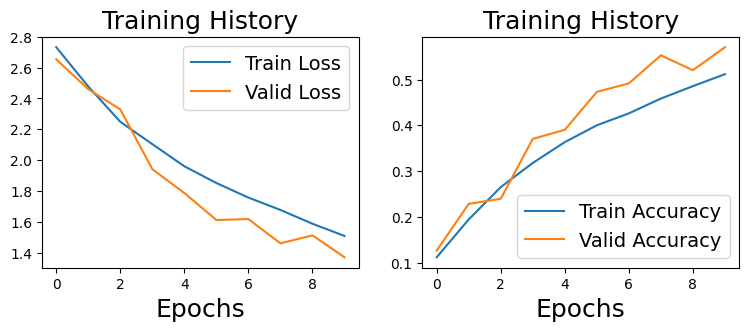

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))

axes[0].plot(base_hist_aug.history['loss'], label='Train Loss')
axes[1].plot(base_hist_aug.history['accuracy'], label='Train Accuracy')

axes[0].plot(base_hist_aug.history['val_loss'], label='Valid Loss')
axes[1].plot(base_hist_aug.history['val_accuracy'], label='Valid Accuracy')

axes[0].set_title("Training History", fontsize=18)
axes[0].set_xlabel("Epochs", fontsize=18)
axes[1].set_title("Training History", fontsize=18)
axes[1].set_xlabel("Epochs", fontsize=18)
axes[0].legend(fontsize=14)
axes[1].legend(fontsize=14);

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step



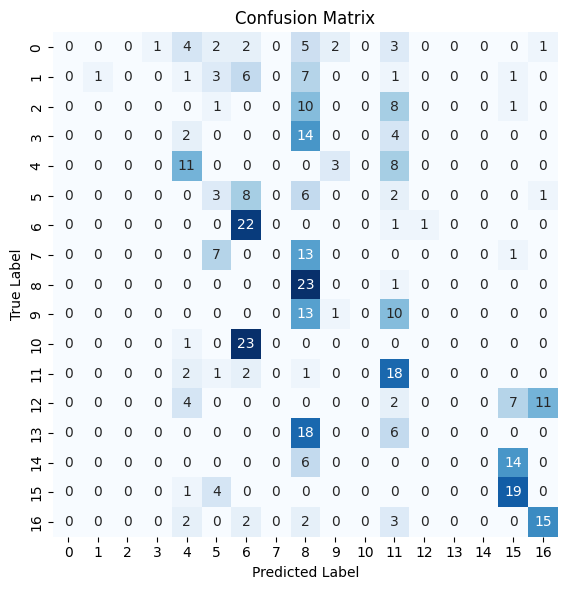

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

y_pred = base_model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)

mat = confusion_matrix(test_labels, y_pred)

fig, axes = plt.subplots(figsize=(6,6), tight_layout=True)
sns.heatmap(mat, square=True, annot=True, fmt='d', 
            cbar=False, cmap="Blues")
axes.set_xlabel('Predicted Label');
axes.set_ylabel('True Label')
axes.set_title('Confusion Matrix')
print()

## Step 6 - Considerations

As we can see mainly from the confusion matrix, the model isn't good enough. We are not good in prediction but we are good on the goodness of the dataset and on the model complexity,  this leads us to conclude that the parameters are not the best we could have.

So, this is the perfect case to use the transfer model technique!

## **IMPORT THE MODEL**

Now we have to chose a model, keras provides us with many pre-trained models. Before we have to think on our task: we have an image classification task and the images are simple, we need a model not too much deep. So we use the VGG16

Firstly we import the model with the weights this model have trained for a classification task called 'imagenet', a dataset with 1000 classes. Then we avoid to import the last densely connected layers, this is because we will chose the configuration on these based on our task. And then we specify the image size for the input shape.

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
vgg_16 = VGG16(weights='imagenet',  
                  include_top=False,   
                  input_shape=(224, 224, 3))

vgg_16.summary()


for i,layer in enumerate(vgg_16.layers):
    print (i, vgg_16.trainable)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

0 True
1 True
2 True
3 True
4 True
5 True
6 True
7 True
8 True
9 True
10 True
11 True
12 True
13 True
14 True
15 True
16 True
17 True
18 True


## Remodelling

We have just printed the parameter trainable of each layer, this parameters allow or not the model to change its parameters during the training phase. As we said before these weights are very important for us and we don't want that they change, so now we freeze the layers. The weights of the layers we inherit from vgg16 won't change, we will change only the weights of the lasts layers that we will add to the model.

In [10]:
for i,layer in enumerate(vgg_16.layers):
    layer.trainable = False

vgg_16.output_shape

(None, 7, 7, 512)

In [11]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from tensorflow.keras import Model, Sequential

top_model_vgg_16 = Sequential()
top_model_vgg_16.add(Dropout(0.25))
top_model_vgg_16.add(Flatten(input_shape=vgg_16.output_shape[1:]))
top_model_vgg_16.add(Dense(512, activation='relu'))
top_model_vgg_16.add(Dropout(0.25))
top_model_vgg_16.add(Dense(17, activation='softmax'))
    
model_vgg_16 = Model(inputs=vgg_16.input, outputs=top_model_vgg_16(vgg_16.output))

model_vgg_16.compile( optimizer="rmsprop",
               loss='categorical_crossentropy',
               metrics=['accuracy'] )

model_vgg_16.summary()


c:\Users\sfori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 17)             │    12,854,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,568,977 (105.17 MB)

 Trainable params: 12,854,289 (49.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
for i,layer in enumerate(model_vgg_16.layers):
    print( i, layer.trainable )

0 False
1 False
2 False
3 False
4 False
5 False
6 False
7 False
8 False
9 False
10 False
11 False
12 False
13 False
14 False
15 False
16 False
17 False
18 False
19 True


In [13]:
vgg_16_hist = model_vgg_16.fit( x = train_generator, # training examples
                  epochs=10,        # number of training epochs 
                  validation_data  = valid_generator,
                  verbose=1)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 683s 4s/step - accuracy: 0.1831 - loss: 5.6719 - val_accuracy: 0.3314 - val_loss: 2.0055
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 723s 4s/step - accuracy: 0.4258 - loss: 1.7857 - val_accuracy: 0.6000 - val_loss: 1.3057
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 715s 4s/step - accuracy: 0.5310 - loss: 1.4494 - val_accuracy: 0.5801 - val_loss: 1.3009
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 690s 4s/step - accuracy: 0.5880 - loss: 1.3059 - val_accuracy: 0.7137 - val_loss: 0.9640
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 682s 4s/step - accuracy: 0.6220 - loss: 1.1443 - val_accuracy: 0.7196 - val_loss: 0.9142
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 707s 4s/step - accuracy: 0.6424 - loss: 1.0956 - val_accuracy: 0.7100 - val_loss: 0.9150
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 785s 5s/step - accuracy: 0.6575 - loss: 1.0586 - val_accuracy: 0.7232 - val_loss: 0.8576
Epoch 8/10
 73/170 ━━━━━━━━━━━━━━━━━━━━ 5:31 3s/step - accuracy: 0.6684 - loss: 0.9886

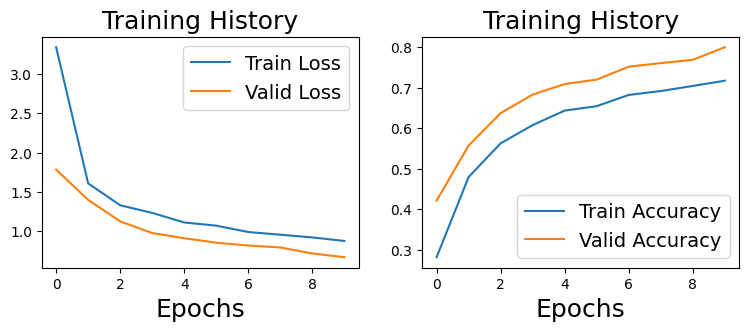

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot training epochs

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,3))

axes[0].plot(vgg_16_hist.history['loss'], label='Train Loss')
axes[1].plot(vgg_16_hist.history['accuracy'], label='Train Accuracy')

axes[0].plot(vgg_16_hist.history['val_loss'], label='Valid Loss')
axes[1].plot(vgg_16_hist.history['val_accuracy'], label='Valid Accuracy')

axes[0].set_title("Training History", fontsize=18)
axes[0].set_xlabel("Epochs", fontsize=18)
axes[1].set_title("Training History", fontsize=18)
axes[1].set_xlabel("Epochs", fontsize=18)
axes[0].legend(fontsize=14)
axes[1].legend(fontsize=14);

12/12 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step



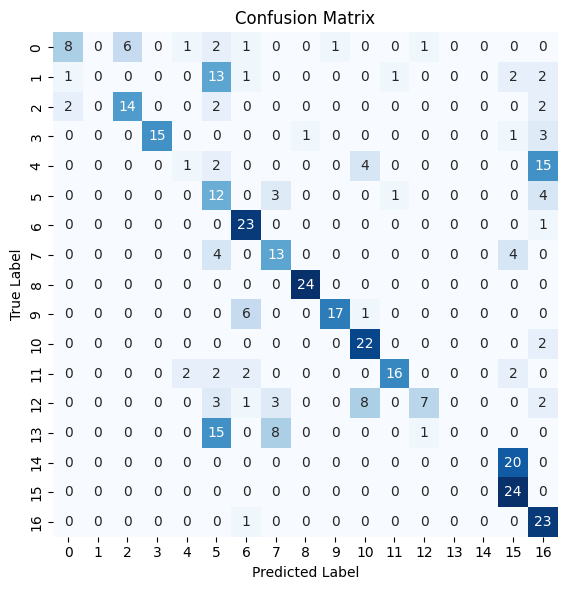

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

y_pred = model_vgg_16.predict(test_images)
y_pred = np.argmax(y_pred, axis=1) # argmax along axis 1

mat = confusion_matrix(test_labels, y_pred)

fig, axes = plt.subplots(figsize=(6,6), tight_layout=True)
sns.heatmap(mat, square=True, annot=True, fmt='d', 
            cbar=False, cmap="Blues")
axes.set_xlabel('Predicted Label');
axes.set_ylabel('True Label')
axes.set_title('Confusion Matrix')
print()

## **VGG16's consideration**

By observing the confusion matrix we can say that there was a great improovment from the model we built and this model we inherited. We have still some outliers but these are very less than in the first case. We can also see on the graphs that we improoved also the loss and accuracy score, this with the same training epochs and with the same epochs